参考: 
- https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
- https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 使用 3d 图必须要先 import Axes3D
import matplotlib as mpl 
# mpl.style.use('default')  # seaborn

# %matplotlib inline
%matplotlib notebook
# viewing figures interactively rather than statically in the notebook

## Three-dimensional Points and Lines

<IPython.core.display.Javascript object>


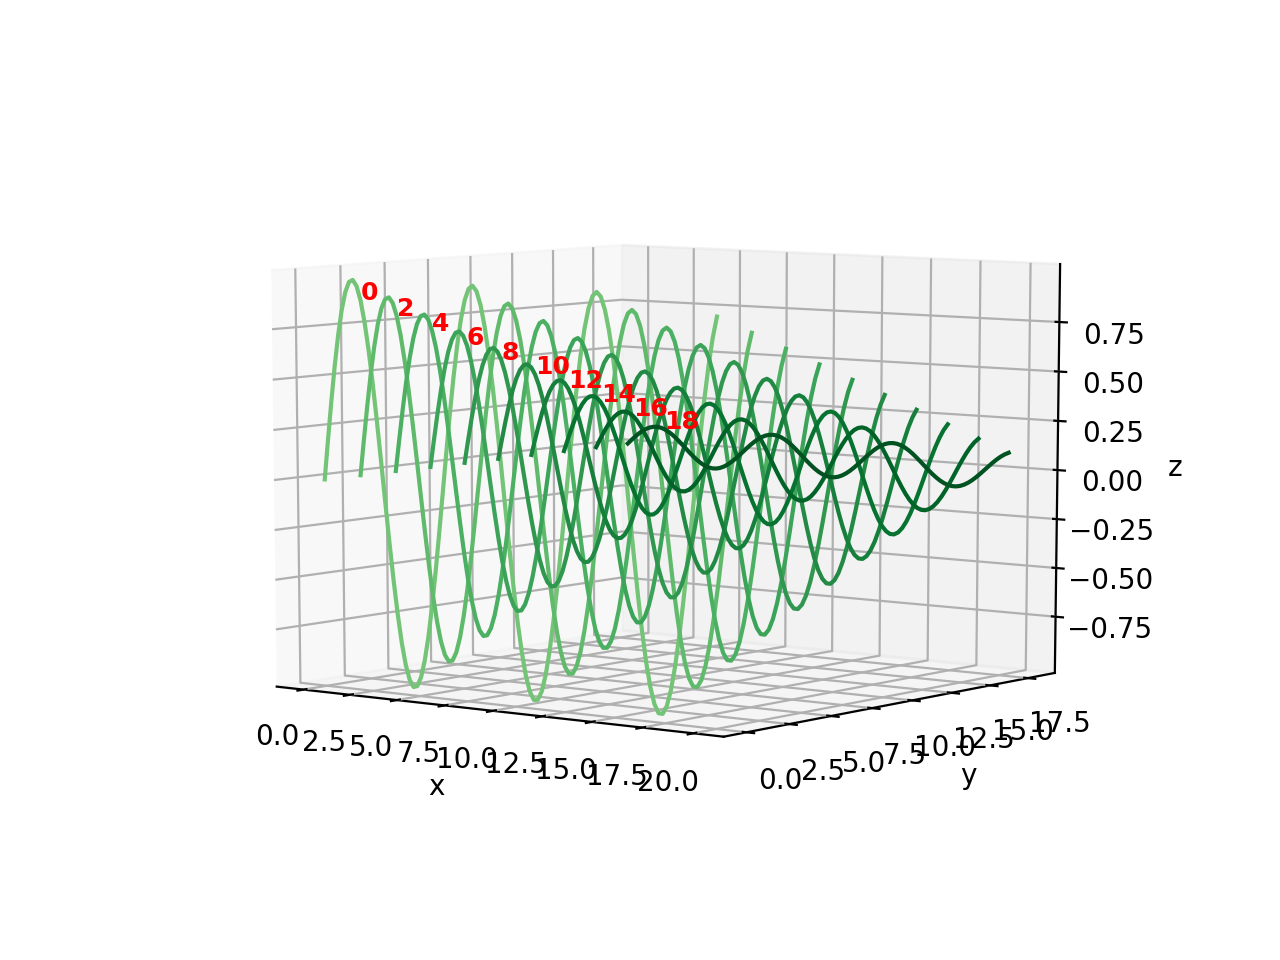

In [60]:
import matplotlib.colors as mcolors
import matplotlib.cm as cmx

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(10, -60)  # vertical,horizontal

num, step = 20, 2

# color map
cmap = plt.get_cmap('Greens')  
cNorm = mcolors.Normalize(vmin=-num, vmax=num)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

x = np.linspace(0, 20, 100)

for i in range(num):
    if i % step == 0:
        a = (num - i) / num
        z = a * np.sin(x)
        y = np.array([i] * len(x))
        # ax.plot3D(x, y, z)  # 默认使用不同颜色
        # ax.plot3D(x, y, z, c=(0,a,0))
        ax.plot3D(x, y, z, c=scalarMap.to_rgba(i))
        ax.text(x[10], y[10], z[10], str(i), color='r', fontdict={'weight': 'bold', 'size': 9})

In [86]:
def fake_curve_data(num=5):
    curves = []
    for i in range(num):
        a = np.arange(0, 10).reshape(10,1)  # batch size need
        b = (i + 1) / num * a**2
        curves.append((a, b))
    curves = np.array(curves)
    return curves

<IPython.core.display.Javascript object>


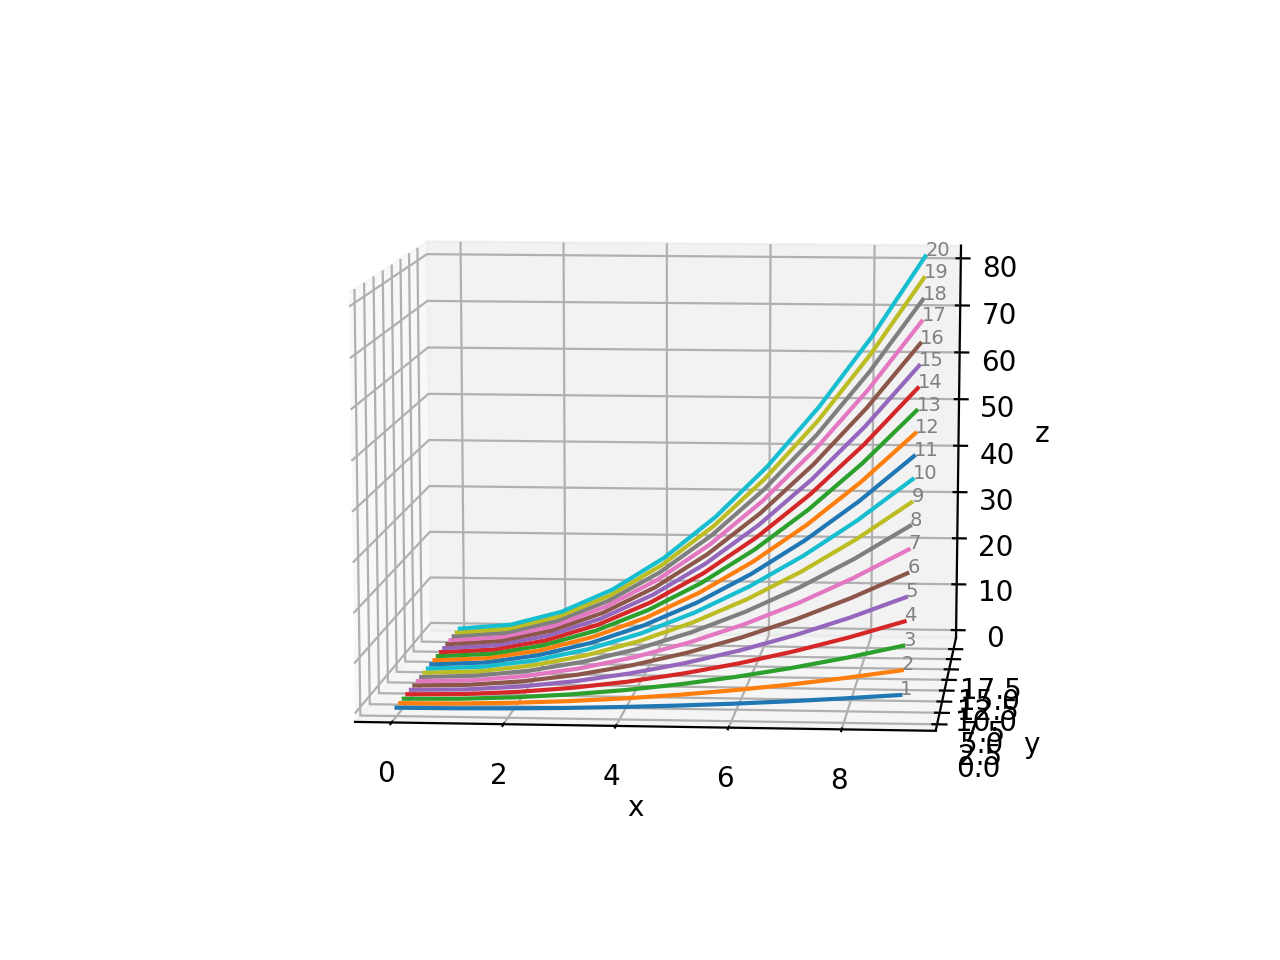

In [92]:
# get curves
curve_num = 20
curves_data = fake_curve_data(curve_num)
curves_data = curves_data.squeeze(-1)  # 去掉 1，作图 x,y,z 都是 1D

# plot 3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, -85)  # vertical,horizontal

step = 1
for i in range(len(curves_data)):
    if i % step == 0:
        x = curves_data[i][0]
        z = curves_data[i][1]
        y = np.array([i] * len(x))
        ax.plot3D(x, y, z)
        ax.text(x[9], y[9], z[9], f'{i+1}', color='gray',  fontdict={'size': 7})

## VNet loss-weights map

<IPython.core.display.Javascript object>


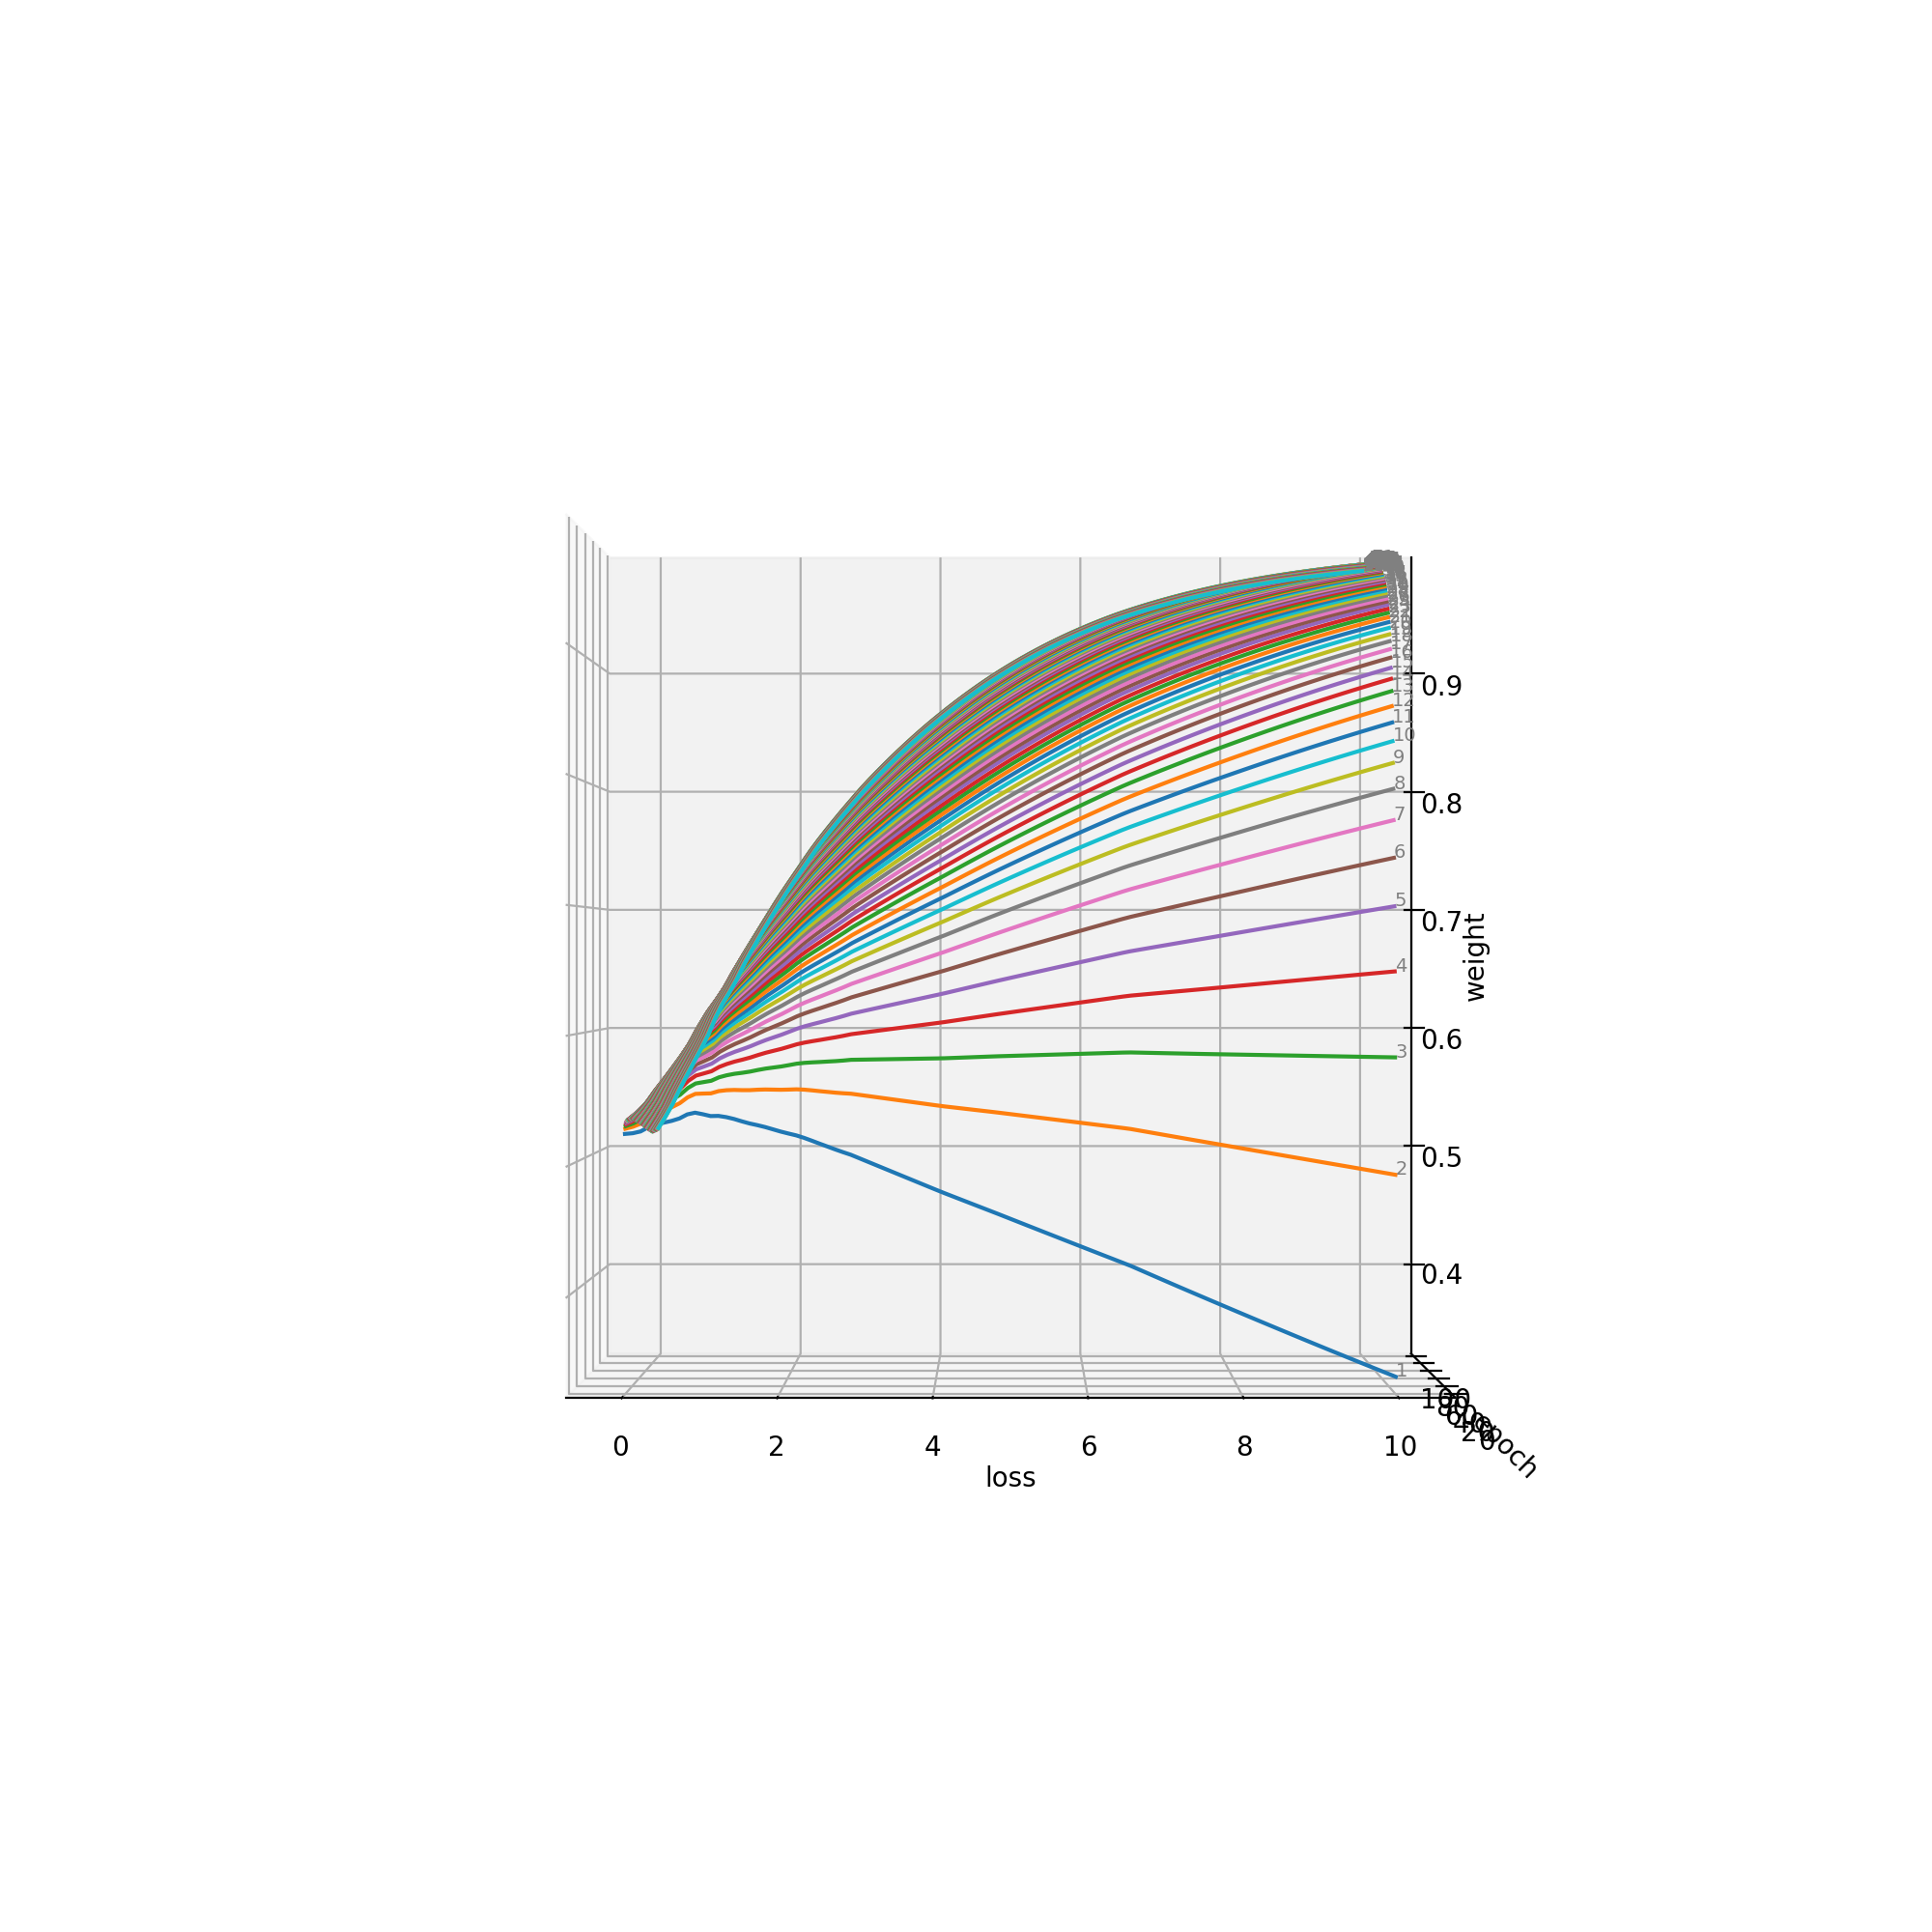

In [30]:
curves_data = np.load('npy/mw_cifar10_imb100_curves_data.npy')
curves_data = curves_data.squeeze(-1)  # (100, 2, 100)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('loss')
ax.set_ylabel('epoch')
ax.set_zlabel('weight')
# ax.set_title('mw_cifar10_imb100')
ax.view_init(0, -90)  # vertical,horizontal

step = 1
for i in range(len(curves_data)):
    if i % step == 0:
        x = curves_data[i][0]
        z = curves_data[i][1]
        y = np.array([i] * len(x))
        ax.plot3D(x, y, z)
        ax.text(x[99], y[99], z[99], f'{i+1}', color='gray',  fontdict={'size': 7})

<IPython.core.display.Javascript object>


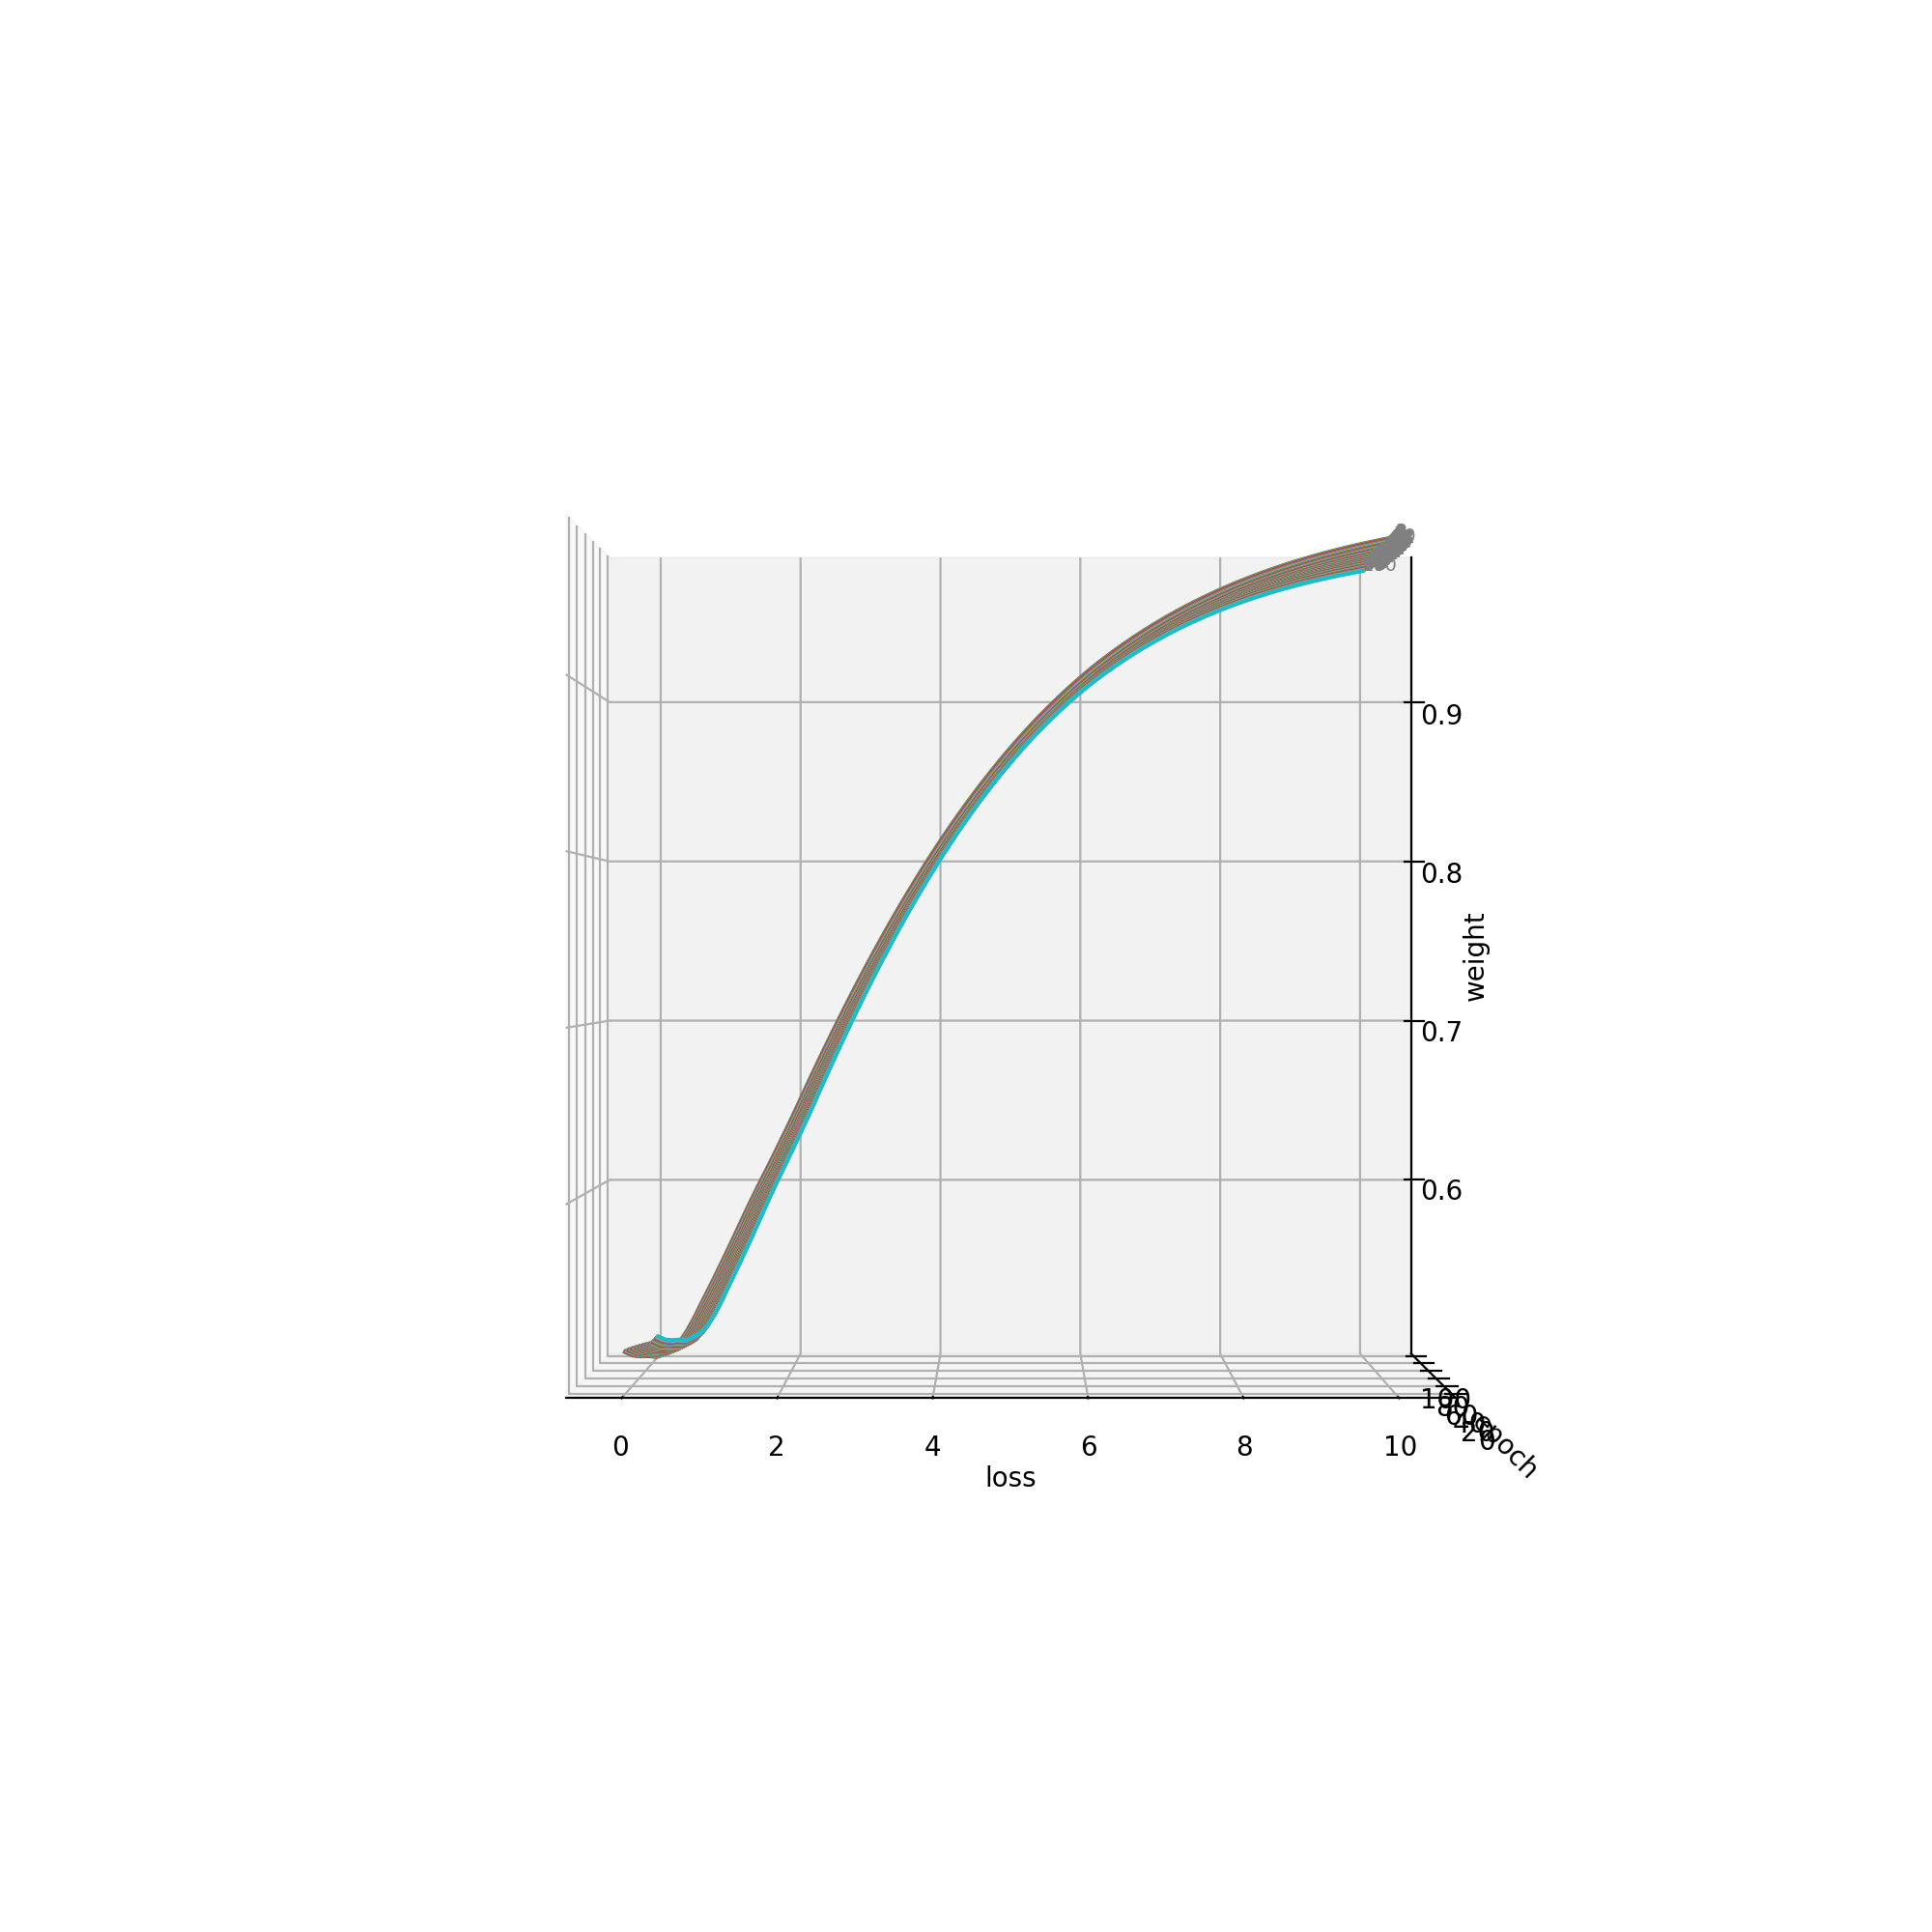

In [26]:
curves_data = np.load('npy/mw_cifar100_imb10_curves_data.npy')
curves_data = curves_data.squeeze(-1)  # (100, 2, 100)

fig = plt.figure(figsize=(10,10))  # figsize=(10,10)
ax = plt.axes(projection='3d')
ax.set_xlabel('loss')
ax.set_ylabel('epoch')
ax.set_zlabel('weight')
# ax.set_title('mw_cifar10_imb100')
ax.view_init(0, -90)  # vertical,horizontal

step = 1
for i in range(len(curves_data)):
    if i % step == 0:
        x = curves_data[i][0]
        z = curves_data[i][1]
        y = np.array([i] * len(x))
        ax.plot3D(x, y, z)
        ax.text(x[99], y[99], z[99], f'{i+1}', color='gray',  fontdict={'size': 7})

In [27]:
print(curves_data[0][1])

[0.5149507  0.5129806  0.5124943  0.51269567 0.5121988  0.5139718
 0.5159747  0.5205703  0.52724224 0.53537875 0.54440963 0.553128
 0.5621583  0.5713201  0.58071107 0.5902225  0.59961927 0.60865796
 0.6174178  0.62624174 0.63537186 0.6444057  0.6538677  0.66347295
 0.6729451  0.6822783  0.6914671  0.7005069  0.70939314 0.7181219
 0.72668946 0.7350731  0.7432848  0.75132805 0.75920105 0.7669021
 0.7744299  0.7817839  0.7889634  0.7959683  0.8027989  0.80945563
 0.815939   0.82225037 0.82839066 0.8343617  0.8401651  0.84580266
 0.8512766  0.8565892  0.86174285 0.86674    0.8715835  0.87625825
 0.88077676 0.88515186 0.8893865  0.89348394 0.89744705 0.90127885
 0.90498275 0.9084971  0.9118649  0.9151201  0.918266   0.92130536
 0.92424107 0.92707586 0.92981255 0.9324541  0.93500316 0.93746257
 0.9398348  0.9421227  0.9443286  0.94645536 0.9485053  0.9504807
 0.95238423 0.95421815 0.9559847  0.95768595 0.9593244  0.960902
 0.9624208  0.96388274 0.96528995 0.9666442  0.96795    0.96920824
 0.

In [28]:
print(curves_data[1][1])

[0.5148343  0.51285654 0.5123625  0.5125559  0.5120504  0.5138147
 0.5158087  0.5203951  0.5270581  0.5351857  0.54420763 0.5529172
 0.56193864 0.57109183 0.58047426 0.5899777  0.5993666  0.60839766
 0.61715025 0.62596714 0.63509077 0.64411837 0.6535748  0.663175
 0.67264247 0.6819715  0.6911567  0.7001932  0.70907664 0.7178029
 0.7263685  0.73475057 0.74296105 0.75100344 0.758876   0.7665769
 0.7741052  0.78145975 0.7886403  0.7956466  0.80247897 0.8091375
 0.8156232  0.82193714 0.82808036 0.8340543  0.8398609  0.84550196
 0.8509796  0.856296   0.86145365 0.86645496 0.8713027  0.87598187
 0.8805048  0.8848844  0.88912374 0.8932257  0.8971936  0.90103036
 0.904739   0.9082582  0.9116305  0.91489047 0.9180411  0.9210852
 0.92402536 0.92686486 0.92960626 0.93225247 0.9348061  0.93727005
 0.9396467  0.94193906 0.9441495  0.9462806  0.94833475 0.95031446
 0.95222217 0.95406026 0.9558309  0.95753634 0.9591786  0.96076
 0.9622826  0.96374834 0.96515924 0.96651703 0.9678265  0.96908814
 0.970